<a href="https://colab.research.google.com/github/ChetanAIML/Team5/blob/main/ML_FinalProject_Team5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Fundamentals Final Project
Chetan Shah, Nathan Edwards, Kayla Wright

## Importing Libraries/Dataset

In [46]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

collab = 1

try:
     drive.mount("/content/drive", force_remount=True)
except:
    collab = 0

if(collab):
    from google.colab import drive
    drive.mount("/content/drive", force_remount=True)

warnings.filterwarnings('ignore')

Mounted at /content/drive
Mounted at /content/drive


In [7]:
 # Kayla

df = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')

In [6]:
if(not collab):
    from google.colab import drive
    drive.mount("/content/drive", force_remount=True)
    df=pd.read_csv("/content/drive/Shareddrives/Project/ML-Team5/diabetes_prediction_dataset.csv")

Mounted at /content/drive


FileNotFoundError: ignored

In [ ]:
if(not collab):
    df=pd.read_csv("/content/drive/Shareddrives/Project/ML-Team5/diabetes_prediction_dataset.csv")

## Sanity Checks
Checking info, unique values, fixing features, value counts, checking duplicates

In [8]:
# Checking if dataset loaded properly
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


There are no missing values in this dataset. We have 9 columns with 100,000 rows. It does not look like any of the values have an incorrect datatype.

In [10]:
# Checking unique values for this dataset
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

I wanted to see the number of unique values are in the smoking history feature. I want to investigate this further.

In [11]:
# Creating a list for the columns that I want to investigate
columns = ['gender', 'smoking_history']
# Getting value counts
for i in columns:
  print(df[i].value_counts())
  print('*' * 25)

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64
*************************
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64
*************************


It looks like there is a value called 'ever' which in my opinion is a missclassification of 'never' so I want to fix that before going any further.

In [12]:
# Replacing ever to never
df.smoking_history = df.smoking_history.replace('ever', 'never')

In [13]:
# Checking value counts once more
df.smoking_history.value_counts()

never          39099
No Info        35816
former          9352
current         9286
not current     6447
Name: smoking_history, dtype: int64

In [14]:
# Checking statistical info for this dataset
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Mean age is 41 but the lowest age is less than a year old. This must be investigated graphically. I suspect either the ages could be wrong or very young patients were considered in this study.

In [15]:
duplicate = df[df.duplicated()]
duplicate

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [16]:
df = df.drop_duplicates()

In [17]:
duplicate = df[df.duplicated()]
duplicate

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


In [19]:
#@title EDA

numerical_columns = [col for col in df.select_dtypes(['float', 'int']) if col not in ['heart_disease', 'hypertension', 'diabetes']]
categorical_columns = [col for col in df.columns if col not in numerical_columns]

In [20]:
#@title Exploring categorical variables

for col in categorical_columns:
    print(f'{col:-<20} {df[col].unique()}')


for col in categorical_columns:
    print(col)
    print(df[col].value_counts())
    print('-'*20)

gender-------------- ['Female' 'Male' 'Other']
hypertension-------- [0 1]
heart_disease------- [1 0]
smoking_history----- ['never' 'No Info' 'current' 'former' 'not current']
diabetes------------ [0 1]
gender
Female    56068
Male      39918
Other        18
Name: gender, dtype: int64
--------------------
hypertension
0    88543
1     7461
Name: hypertension, dtype: int64
--------------------
heart_disease
0    92083
1     3921
Name: heart_disease, dtype: int64
--------------------
smoking_history
never          38254
No Info        32887
former          9299
current         9197
not current     6367
Name: smoking_history, dtype: int64
--------------------
diabetes
0    87524
1     8480
Name: diabetes, dtype: int64
--------------------


## Univariate Analysis

In [21]:
def boxplot_histogram(data, feature, title, figsize = (12,10), kde = False, bins = None):

  # This function makes a boxplot and a histogram
  # data: dataframe, feature: column of dataframe, figsize: size of figure
  #kde: show curve density, bins: number of bins for the hist plot

  # Setting up figure size, rows
  f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, sharex = True, gridspec_kw = {"height_ratios":(0.25, 0.75)}, figsize = figsize)
  # Creating boxplot
  sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, palette = "winter")
  # Creating histplot
  sns.histplot(
    data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="violet"
    ) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)
  # Putting mean on histogram
  ax_hist2.axvline(data[feature].mean(), color = "black", linestyle = "--")
  plt.title(title)
  # Putting median to histogram
  ax_hist2.axvline(data[feature].median(), color = "green", linestyle = "-")

In [22]:
def stacked_barplot(data, feature, target, title):

# This function makes a stacked barplot
# Data: dataframe, feature: independent feature variable, target: target variable

    # Getting unique values
    count = data[feature].nunique()
    # Sorting values
    sorter = data[target].value_counts().index[-1]
    # Make a crosstab of the factors
    one = pd.crosstab(data[feature], data[target], margins=True).sort_values(
        by=sorter, ascending=False)
    # Print the crosstab
    print(one)
    print("*" * 120)
    # Make another crosstab of the factors
    two = pd.crosstab(data[feature], data[target], normalize="index").sort_values(
        by=sorter, ascending=False)
    # Plot the graph
    two.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(loc="lower left", frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(title)
    plt.show()

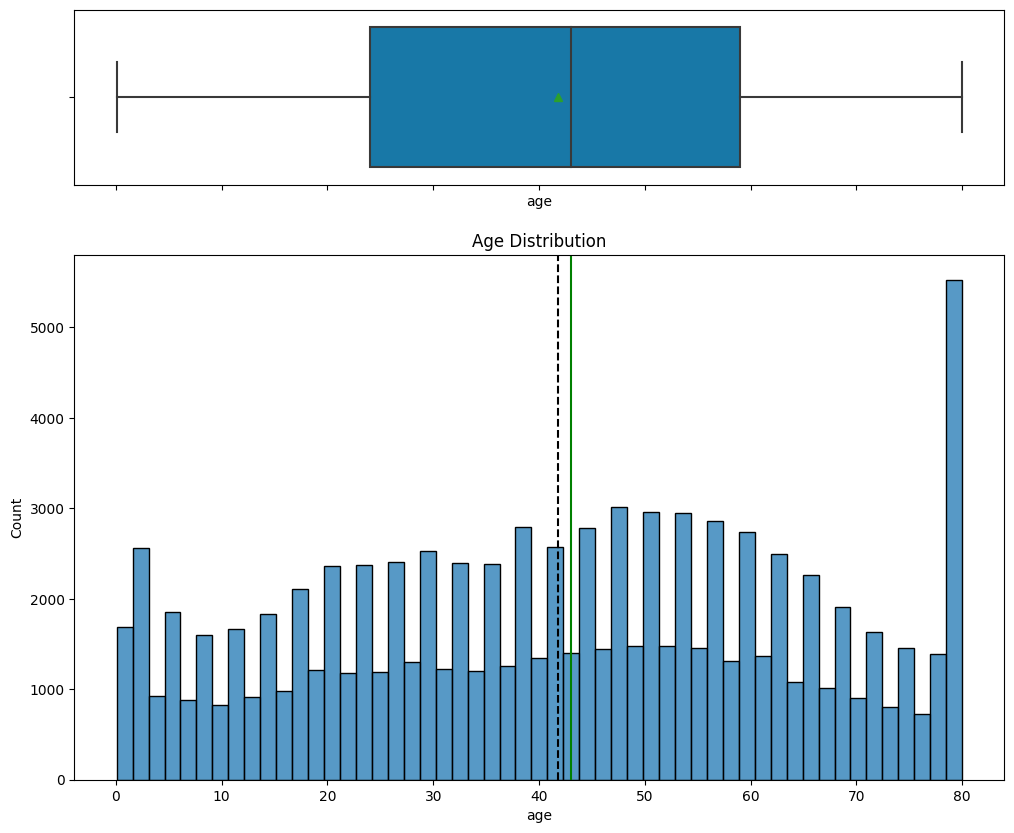

In [23]:
boxplot_histogram(df, "age", "Age Distribution")

There seem to be a lot of people around the age 70 - 80. Otherwise it is a fairly good distribution. No outliers seem to be here.

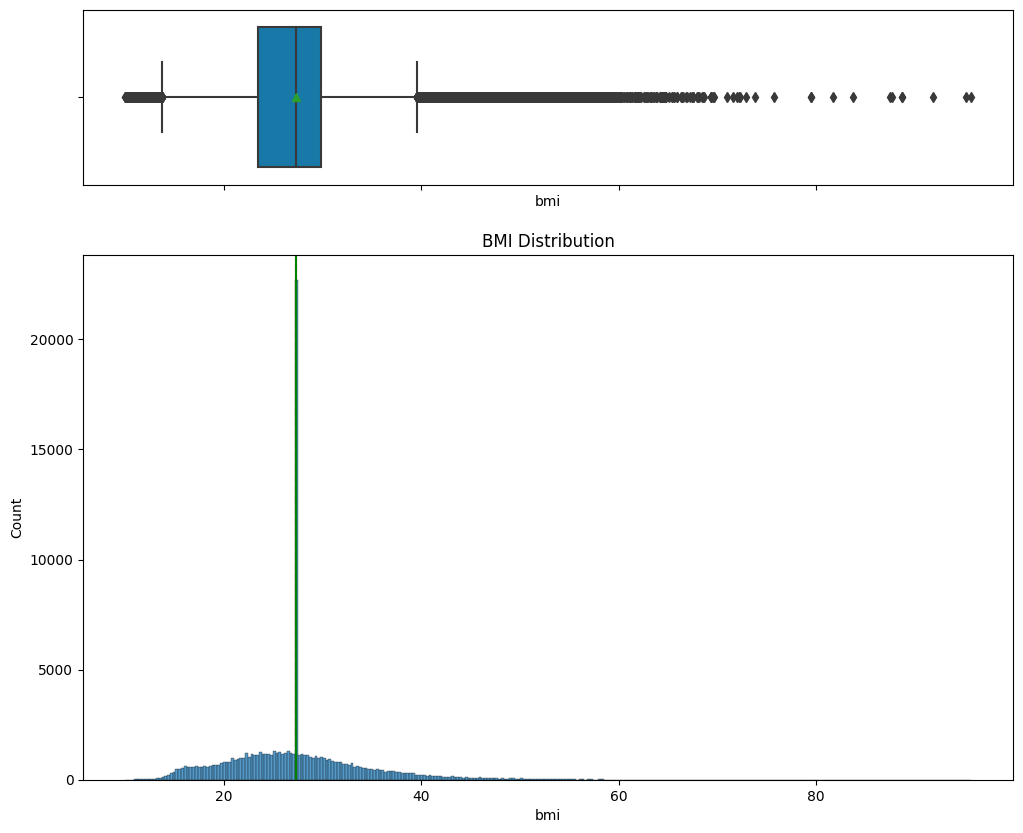

In [24]:
boxplot_histogram(df, "bmi", "BMI Distribution")

BMI is a fairly good distribution. There are very high BMI values but I reasearched this and there in fact has been at least one patient with a BMI over 80. This is entirely possible but quite deadly. I will leave these outliers as is. They may provide more insight to the model rather than hinder it.

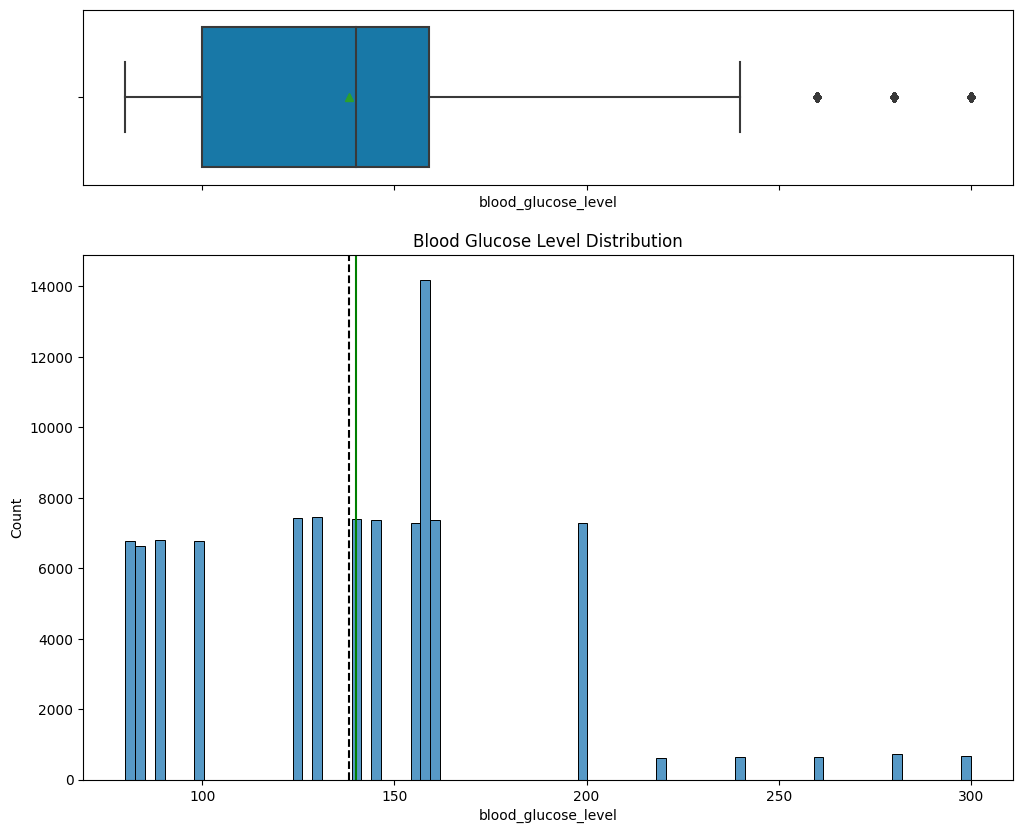

In [25]:
boxplot_histogram(df, "blood_glucose_level", "Blood Glucose Level Distribution")

There are only 18 unique values for this column so I am not suprised to see a graph like this. There do not seem to be crazy outliers.

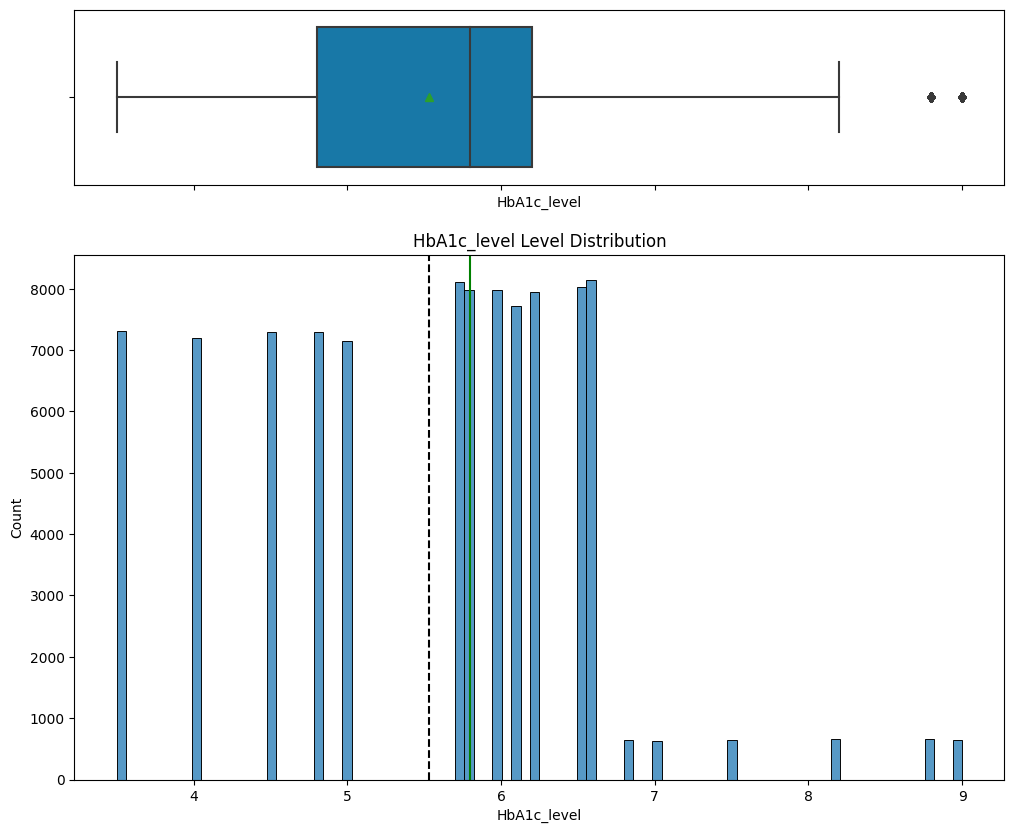

In [26]:
boxplot_histogram(df, "HbA1c_level", "HbA1c_level Level Distribution")

I do not see any outliers that are present for this feature. There are also only 18 different unique values so I am not surprised to see this.

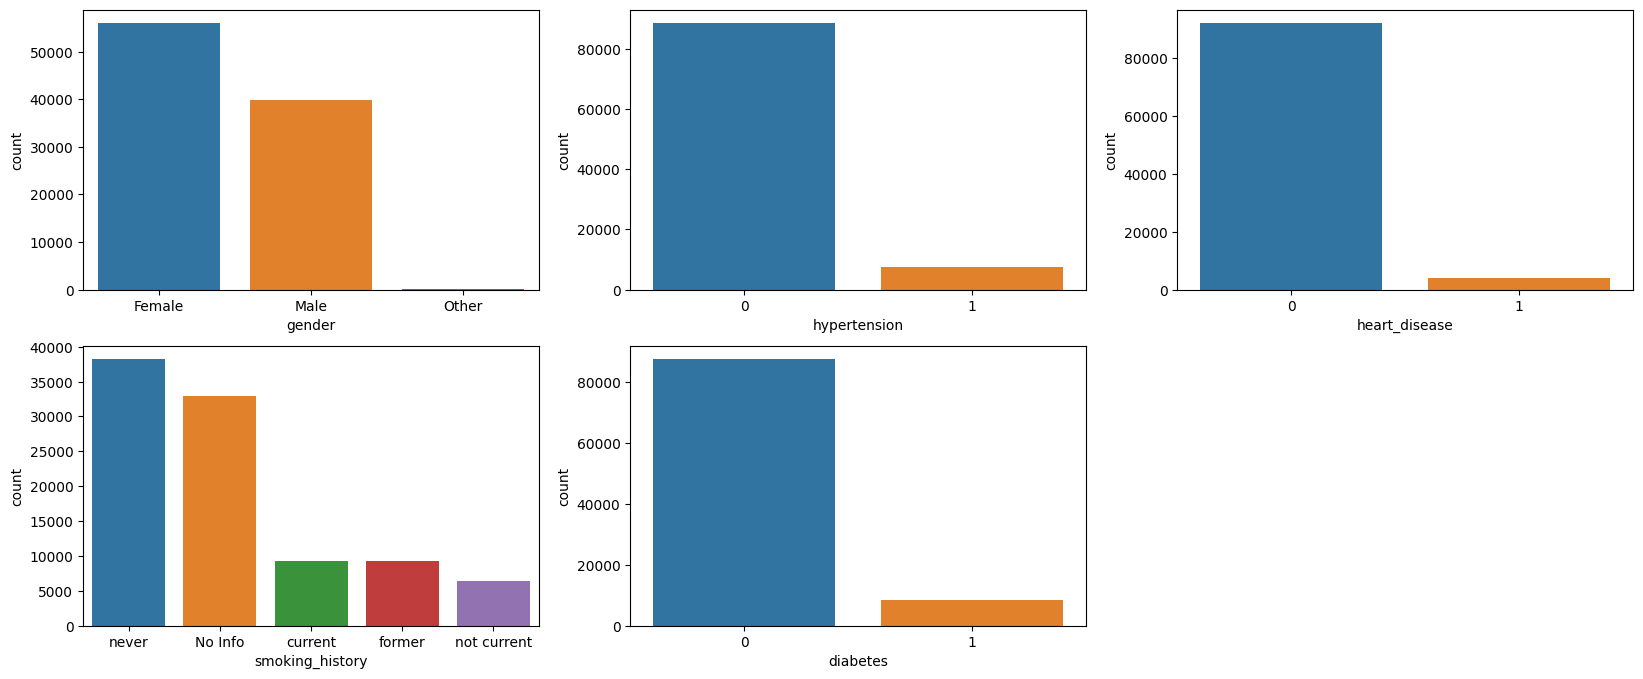

In [27]:
#@title Categorical Counts
plt.figure(figsize=(20, 8))
i = 1
for col in categorical_columns:
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=df[col])
    i+=1

There are more females than males in this dataset. Much more people have hypertension than not in this dataset, which is also true for heart disease. The most common smoking types are never or no informantion. For our target variable I can see a massive class imbalance that could possibly be an issue for our models.

## Multivariate Analysis

diabetes             0     1    All
smoking_history                    
All              87524  8480  96004
never            34447  3807  38254
former            7709  1590   9299
No Info          31442  1445  32887
current           8249   948   9197
not current       5677   690   6367
************************************************************************************************************************


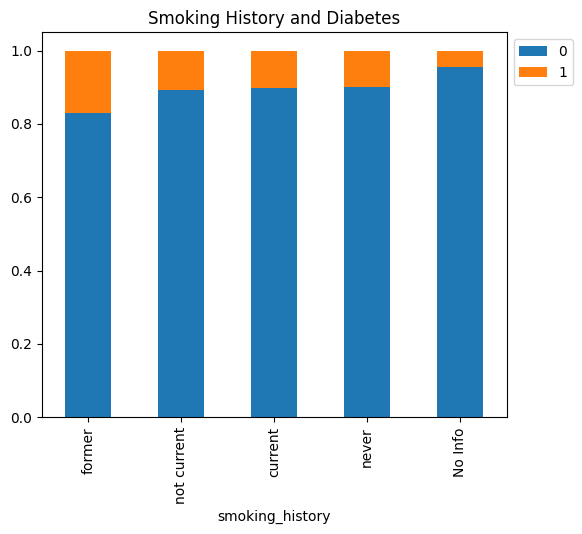

In [28]:
stacked_barplot(df, "smoking_history", "diabetes", "Smoking History and Diabetes")

Former smokers are the most likely to develop diabetes. This makes sense because smoking for a long period of time can cause many, many health issues.

diabetes      0     1    All
gender                      
All       87524  8480  96004
Female    51623  4445  56068
Male      35883  4035  39918
Other        18     0     18
************************************************************************************************************************


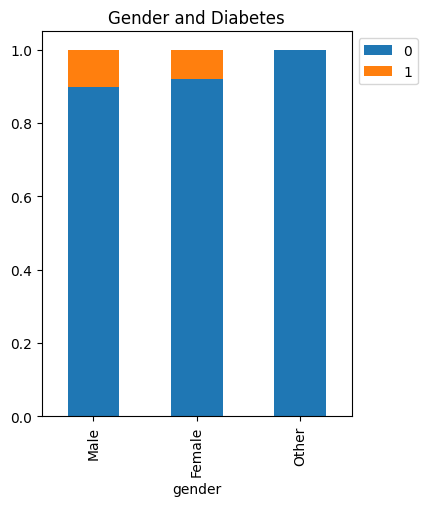

In [29]:
stacked_barplot(df, "gender", "diabetes", "Gender and Diabetes")

Males in this dataset are slightly more likely to have diabetes than women in this dataset.

diabetes          0     1    All
hypertension                    
All           87524  8480  96004
0             82149  6394  88543
1              5375  2086   7461
************************************************************************************************************************


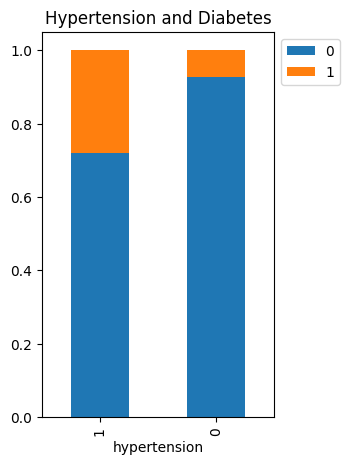

In [30]:
stacked_barplot(df, "hypertension", "diabetes", "Hypertension and Diabetes")

People with hypertension are much more likely to have diabetes than without.

diabetes           0     1    All
heart_disease                    
All            87524  8480  96004
0              84870  7213  92083
1               2654  1267   3921
************************************************************************************************************************


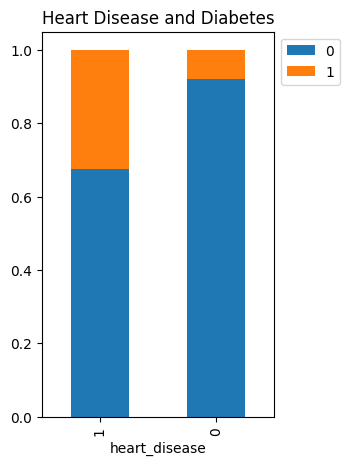

In [31]:
stacked_barplot(df, "heart_disease", "diabetes", "Heart Disease and Diabetes")

People with heart disease are very much more likely to have diabetes than not.

diabetes         0     1    All
HbA1c_level                    
All          87524  8480  96004
5.7           7411   702   8113
6.6           7465   682   8147
8.8              0   660    660
8.2              0   658    658
5.8           7322   658   7980
9.0              0   652    652
6.1           7059   651   7710
6.2           7300   646   7946
6.0           7325   646   7971
6.8              0   642    642
7.5              0   642    642
7.0              0   632    632
6.5           7425   609   8034
4.0           7194     0   7194
5.0           7142     0   7142
4.8           7287     0   7287
4.5           7286     0   7286
3.5           7308     0   7308
************************************************************************************************************************


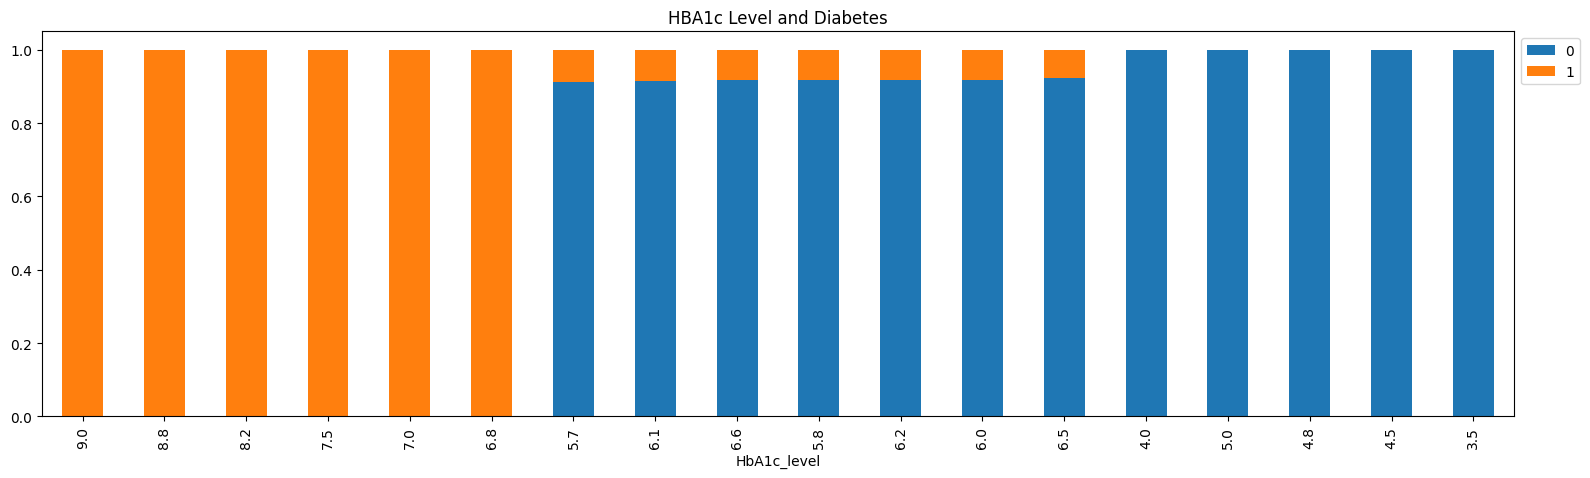

In [32]:
stacked_barplot(df, "HbA1c_level", "diabetes", "HBA1c Level and Diabetes")

HBA1c is glycated hemoglobin which is chemically linked to sugar. The test for HBA1c shows how much blood suger on average a person has had for the past couple months. It seems to me that once the HBA1c level gets as high as 6.5, then diabetes can occur. Once a patient reaches 6.8 or higher it becomes a 100% chance the patient will have diabetes in this dataset.

diabetes                 0     1    All
blood_glucose_level                    
All                  87524  8480  96004
280                      0   724    724
160                   6688   694   7382
130                   6770   689   7459
300                      0   673    673
159                   6803   666   7469
145                   6701   662   7363
200                   6632   647   7279
126                   6779   636   7415
260                      0   634    634
240                      0   633    633
140                   6778   625   7403
220                      0   599    599
155                   6675   598   7273
80                    6770     0   6770
85                    6621     0   6621
100                   6767     0   6767
90                    6813     0   6813
158                   6727     0   6727
************************************************************************************************************************


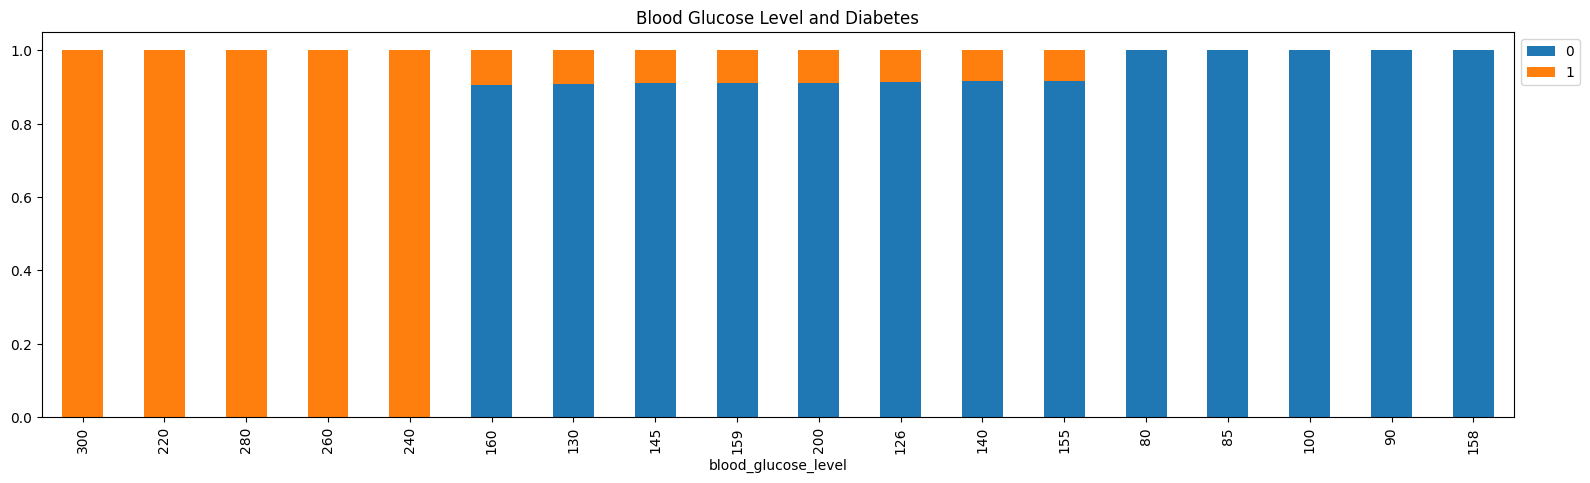

In [33]:
stacked_barplot(df, "blood_glucose_level", "diabetes", "Blood Glucose Level and Diabetes")

For blood glucose level in this dataset, it seems that a blood glucose level of 130 or more can correlate with diabetes. Any level higher than 220 is a 100% chance of having diabetes. This makes sense because diabetes makes it harder for the human body to break down sugars.

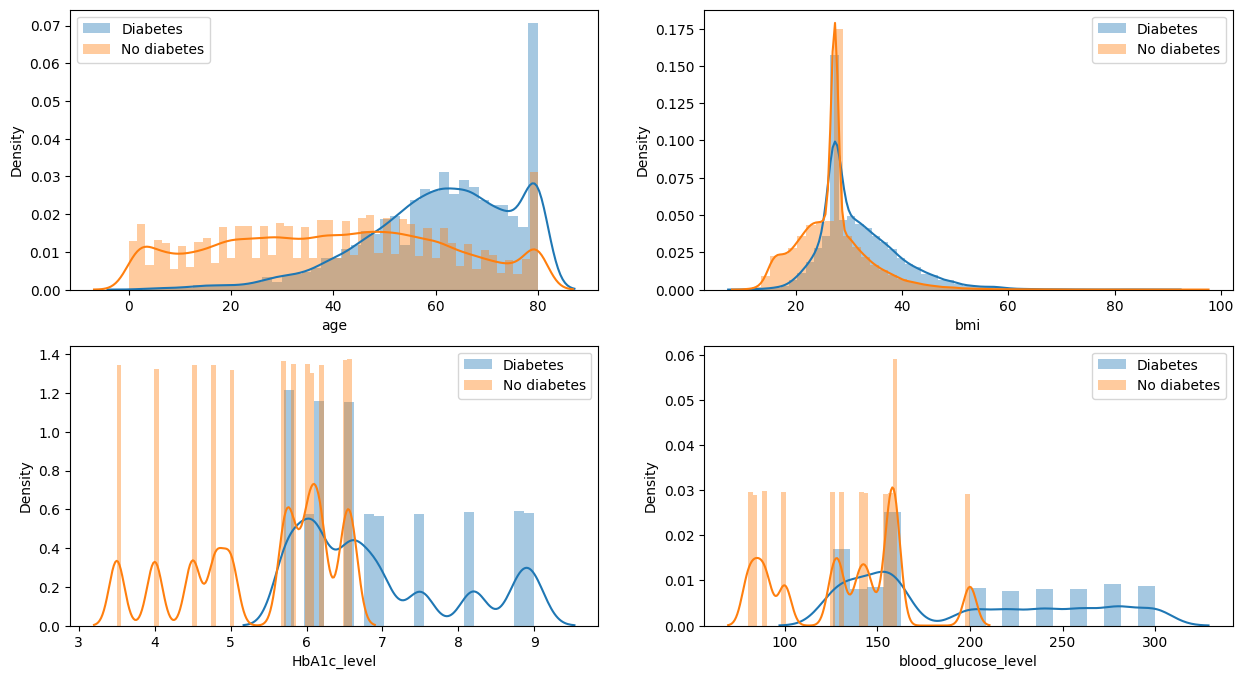

In [34]:
#@title Target/Numerical Variable Relationship

diabetes_yes = df[df['diabetes'] == 1]
diabetes_no = df[df['diabetes'] == 0]

plt.figure(figsize=(15, 8))
i=1
for col in numerical_columns:
    plt.subplot(2, 2, i)
    sns.distplot(diabetes_yes[col], label='Diabetes')
    sns.distplot(diabetes_no[col], label='No diabetes')
    plt.legend()
    i+=1

Older people are much more likely to have diabetes. People that weigh more are also more likely to have diabetes it seems. As found previously, people are more likely to have diabetes with higher HbA1c and glucose levels.

<Axes: >

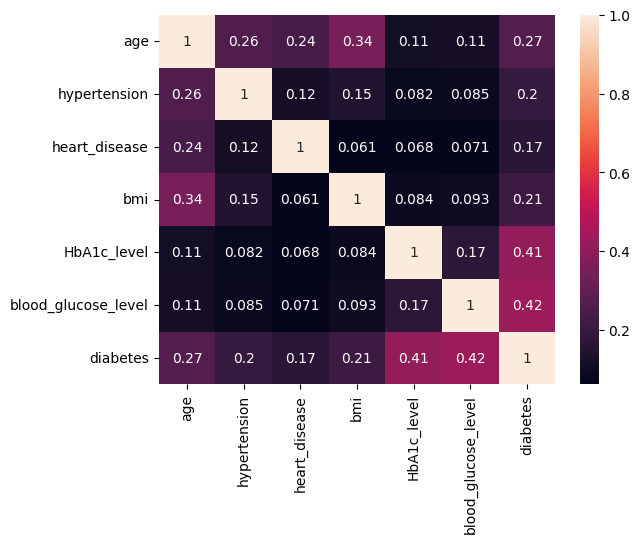

In [35]:
#@title Correlation between variables
sns.heatmap(df.corr(), annot=True)

The variables that correlate with having diabetes the most are blood glucose levels (0.42) and HbA1c level (0.41). Age is also a small correlation (0.27) with hypertension right behind it (0.20), along with BMI (0.21). I do not see heavily correlated variables amongst the other features that we need to address.

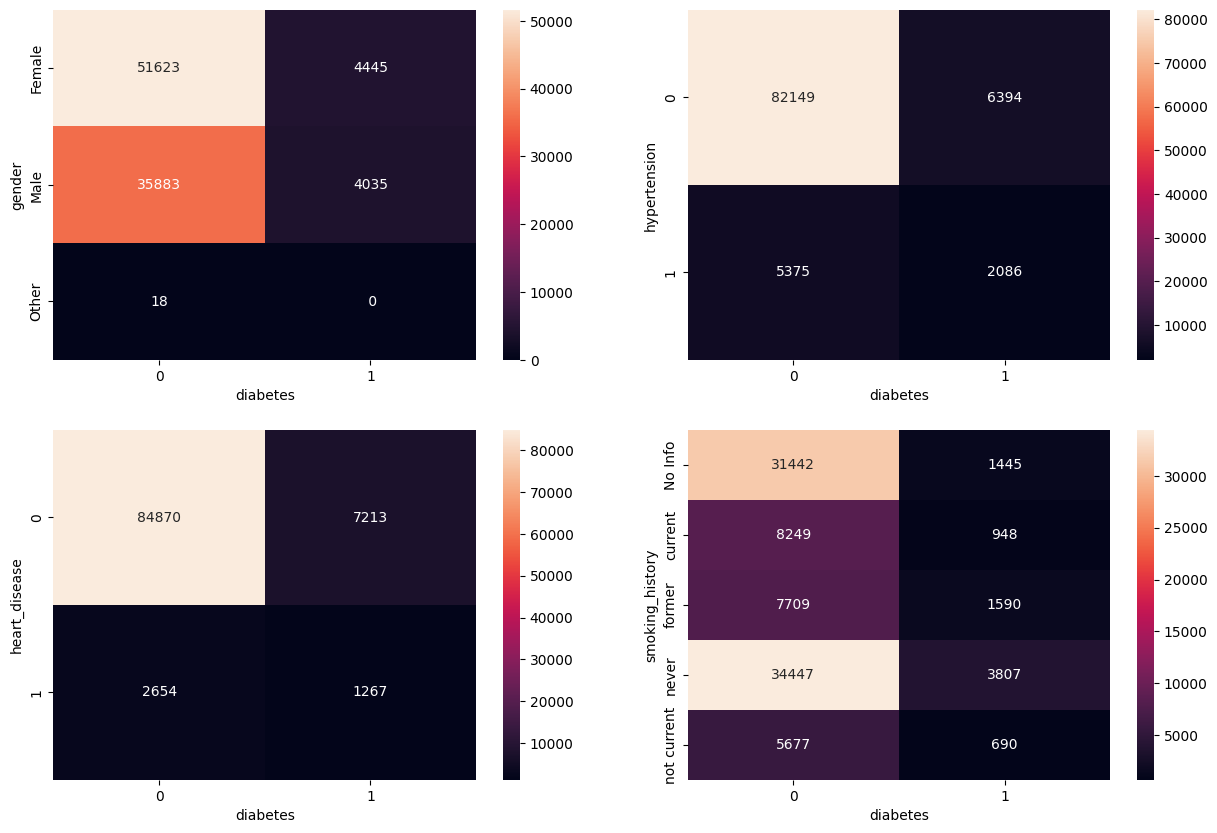

In [36]:
#@title Target/Categorical Variable Relationship

plt.figure(figsize=(15, 10))
i = 1
for col in categorical_columns:
    if col != 'diabetes':
        plt.subplot(2, 2, i)
        sns.heatmap(pd.crosstab(df[col], df['diabetes']), fmt='2', annot=True)
        i+=1

# Handeling Outliers and Categorical data

In [37]:
one_hot = pd.get_dummies(df['smoking_history'])
df = df.drop('smoking_history',axis = 1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['gender'])
df = df.drop('gender',axis = 1)
df = df.join(one_hot)

df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,No Info,current,former,never,not current,Female,Male,Other
0,80.0,0,1,25.19,6.6,140,0,0,0,0,1,0,1,0,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,1,0,0
2,28.0,0,0,27.32,5.7,158,0,0,0,0,1,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,0,0,1,0


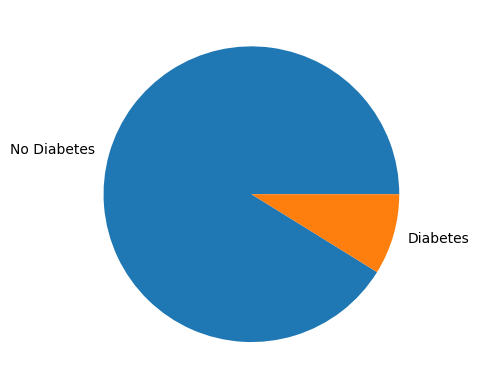

In [38]:
y = df.diabetes
count_0 = 0
count_1 = 0
for i in y:
  if i==1:
    count_1+=1
  else:
    count_0+=1
plt.pie([count_0,count_1], labels = ["No Diabetes", "Diabetes"])
plt.show()

In [39]:
#Going to make Train and test set before removing outliers because I want them in test set so I need to do before splitting X and y.
msk = np.random.rand(len(df)) < 0.7
train = df[msk]
test = df[~msk]
print(len(train), len(test))

67188 28816


In [40]:
# Deletes data that is 3.5 std above or below.
train_df_no_outliers = (train[(np.abs(stats.zscore(df)) < 3.5).all(axis=1)])
train_df_with_outliers = df

In [41]:
X_train_outliers = train_df_with_outliers
y_train_outliers = X_train_outliers.diabetes
X_train_outliers = X_train_outliers.drop(columns="diabetes")

X_train_no_outliers = train_df_no_outliers
y_train_no_outliers = train_df_no_outliers.diabetes
X_train_no_outliers = X_train_no_outliers.drop(columns="diabetes")

In [42]:
y_test = test.diabetes
X_test = test
X_test = X_test.drop(columns="diabetes")

In [43]:
print(len(X_train_no_outliers),len(X_train_outliers))

59463 96004


In [44]:
#Takes in a list of predicated values and actual and makes a confused matrix
def Confusion_Matrix(predicted, actual):
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()


In [45]:
def Calculate_Model_Scores(predicted, actual):
    print("The model had a accuracy socre of : ", round(accuracy_score(predicted, actual),4))
    print("The model had a precision socre of : ", round(precision_score(predicted, actual),4))
    print("The model had a recall socre of : ", round(recall_score(predicted, actual),4))
    print("The model had a f1 socre of : ", round(f1_score(predicted, actual),4))

## Model 1 - Decision Tree

### Testing With Outliers (not trimmed tree)

The model had a accuracy socre of :  0.999
The model had a precision socre of :  0.9888
The model had a recall socre of :  1.0
The model had a f1 socre of :  0.9944


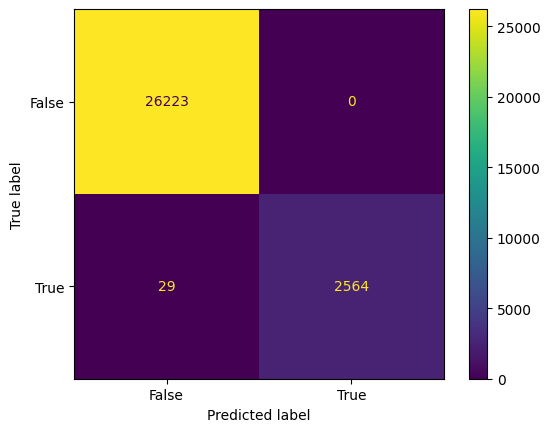

In [47]:
model1 = DecisionTreeClassifier(criterion="gini", random_state=1) # CLassifier object
model1.fit(X_train_outliers, y_train_outliers) # Classifier
test_pred = model1.predict(X_test)
Calculate_Model_Scores(test_pred,y_test)
Confusion_Matrix(test_pred,y_test)

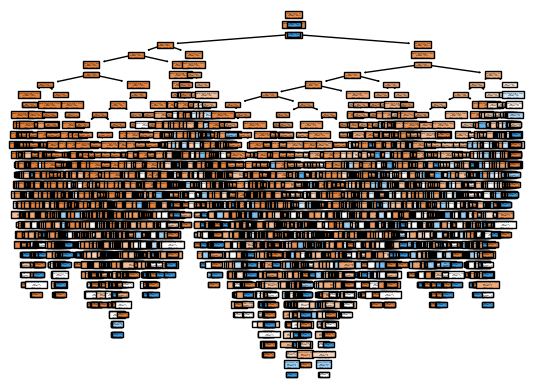

In [49]:
f_names=list(X_test.columns) # Names of features
tree.plot_tree(model1, filled=True, feature_names=f_names) # Plotting
plt.show()

### Testing With Outliers (trimmed tree)

The model had a accuracy socre of :  0.9721
The model had a precision socre of :  0.7042
The model had a recall socre of :  0.9807
The model had a f1 socre of :  0.8198


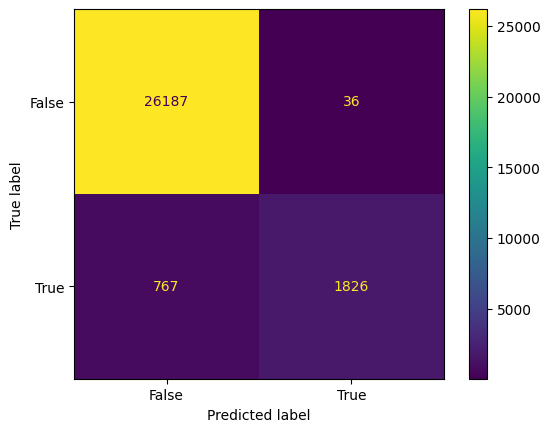

In [54]:
model2 = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=100, min_samples_leaf=20, criterion="gini")
model2.fit(X_train_outliers, y_train_outliers) # Classifier
test_pred = model2.predict(X_test)
Calculate_Model_Scores(test_pred,y_test)
Confusion_Matrix(test_pred,y_test)

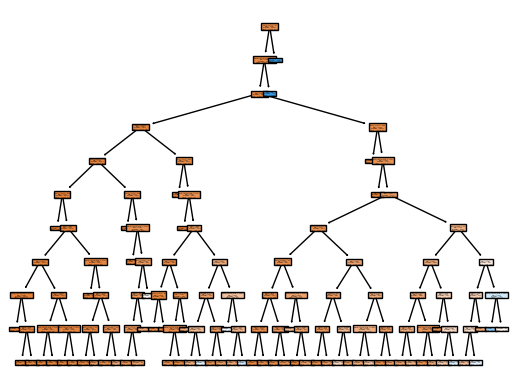

In [55]:
f_names=list(X_test.columns) # Features
tree.plot_tree(model2, filled=True, feature_names=f_names) # Plot using tree
plt.show()

### Testing Without Outliers (untrimmed tree)

The model had a accuracy socre of :  0.9498
The model had a precision socre of :  0.7462
The model had a recall socre of :  0.7101
The model had a f1 socre of :  0.7277


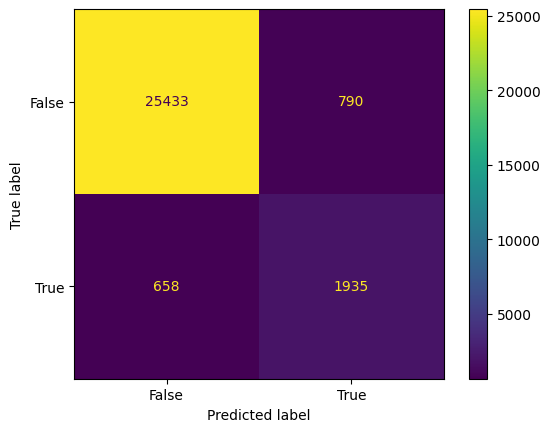

In [57]:
model3 = DecisionTreeClassifier(criterion="gini", random_state=1) # CLassifier object
model3.fit(X_train_no_outliers, y_train_no_outliers) # Classifier
test_pred = model3.predict(X_test)
Calculate_Model_Scores(test_pred,y_test)
Confusion_Matrix(test_pred,y_test)

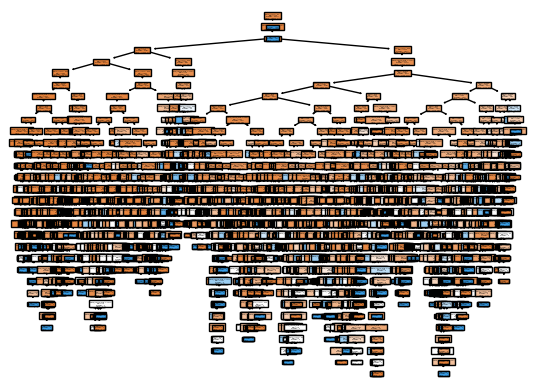

In [58]:
f_names=list(X_test.columns) # Names of features
tree.plot_tree(model3, filled=True, feature_names=f_names) # Plotting
plt.show()

### Testing Without Outliers (trimmed tree)

The model had a accuracy socre of :  0.9714
The model had a precision socre of :  0.6926
The model had a recall socre of :  0.9846
The model had a f1 socre of :  0.8132


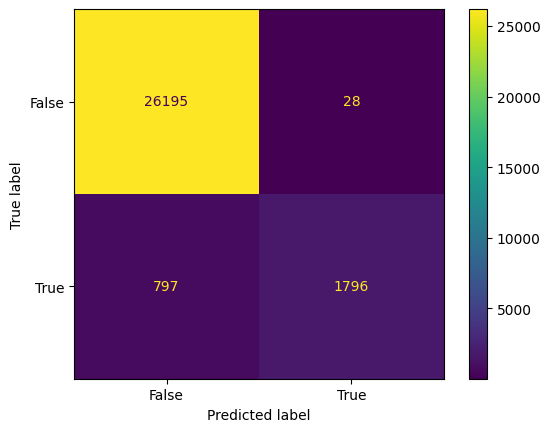

In [59]:
model4 = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=100, min_samples_leaf=20, criterion="gini")
model4.fit(X_train_no_outliers, y_train_no_outliers) # Classifier
test_pred = model4.predict(X_test)
Calculate_Model_Scores(test_pred,y_test)
Confusion_Matrix(test_pred,y_test)

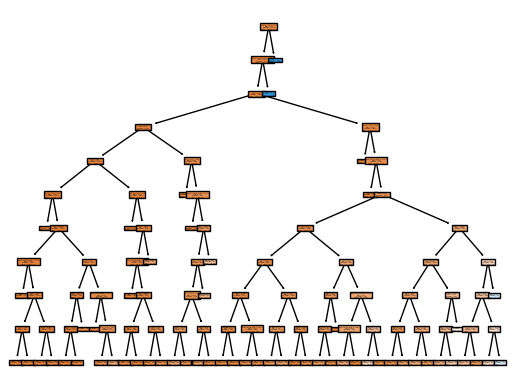

In [60]:
f_names=list(X_test.columns) # Features
tree.plot_tree(model4, filled=True, feature_names=f_names) # Plot using tree
plt.show()

## Model 2 - Random Forest

### Testing with Outliers

The model had a accuracy socre of :  0.9991
The model had a precision socre of :  0.9907
The model had a recall socre of :  0.9992
The model had a f1 socre of :  0.995


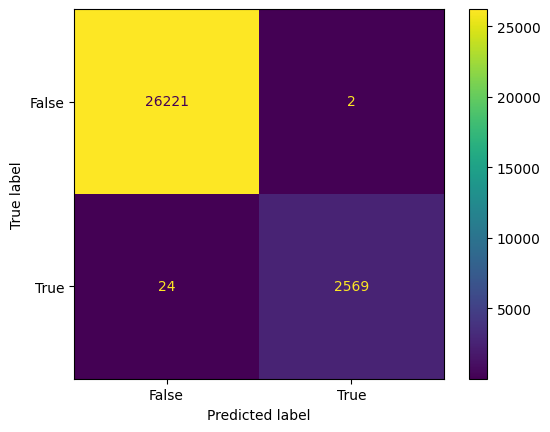

In [61]:
rf1 = RandomForestClassifier(random_state=0) # Random forest classifier object
rf1.fit(X_train_outliers, y_train_outliers) # Training it
test_pred = rf1.predict(X_test)
Calculate_Model_Scores(test_pred,y_test)
Confusion_Matrix(test_pred,y_test)

In [63]:
feature_names = list(X_train_outliers.columns)
print(feature_names)

['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'No Info', 'current', 'former', 'never', 'not current', 'Female', 'Male', 'Other']


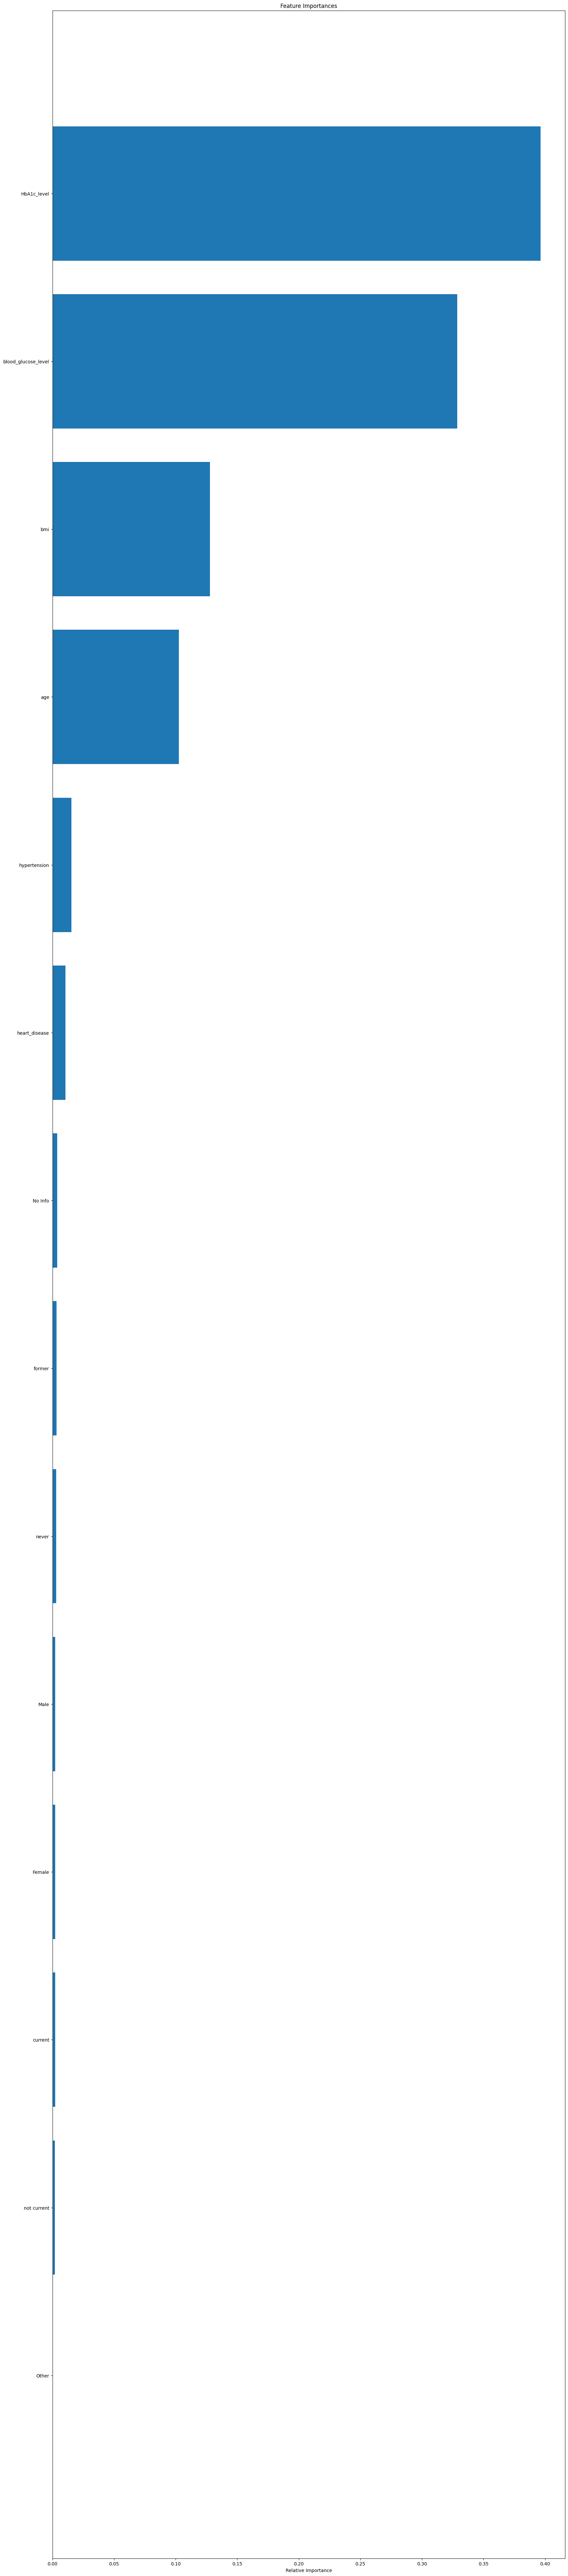

In [66]:
importances = rf1.feature_importances_
indices = np.argsort(importances) # Sorting importances

plt.figure(figsize=(20, 100)) # Making a large feature
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center") # Making the graph look presentable with a bar
plt.yticks(range(len(indices)), [feature_names[i] for i in indices]) # Sorting y ticks
plt.xlabel("Relative Importance")
plt.show()

In [67]:
# This code I used from the professor!
f_names=list(X_train_outliers.columns) # Feature names
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10,2), dpi=3000) # Setup the 1x5 grid for ploting the trees
for index in range(0, 5): # Iterate through the first five trees (of 100)
  tree.plot_tree(rf1.estimators_[index], feature_names=f_names, filled = True, ax=axes[index]); # Plot the tree
  axes[index].set_title('Estimator: ' + str(index), fontsize = 11) # Print title

Error in callback <function flush_figures at 0x7f72114a1480> (for post_execute):


KeyboardInterrupt: ignored

### Testing Without Outliers

The model had a accuracy socre of :  0.9688
The model had a precision socre of :  0.6911
The model had a recall socre of :  0.9476
The model had a f1 socre of :  0.7993


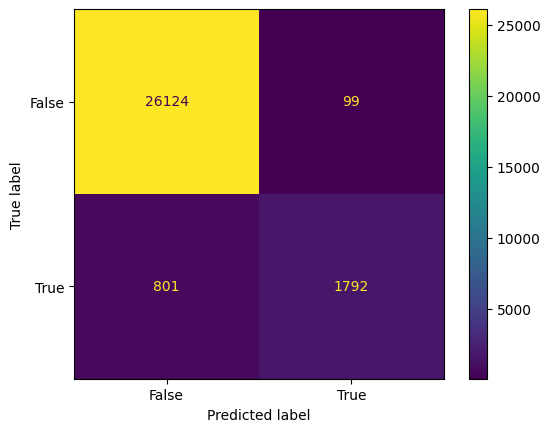

In [68]:
rf2 = RandomForestClassifier(random_state=0) # Random forest classifier object
rf2.fit(X_train_no_outliers, y_train_no_outliers) # Training it
test_pred = rf2.predict(X_test)
Calculate_Model_Scores(test_pred,y_test)
Confusion_Matrix(test_pred,y_test)

In [69]:
feature_names = list(X_train_no_outliers.columns)
print(feature_names)

['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'No Info', 'current', 'former', 'never', 'not current', 'Female', 'Male', 'Other']


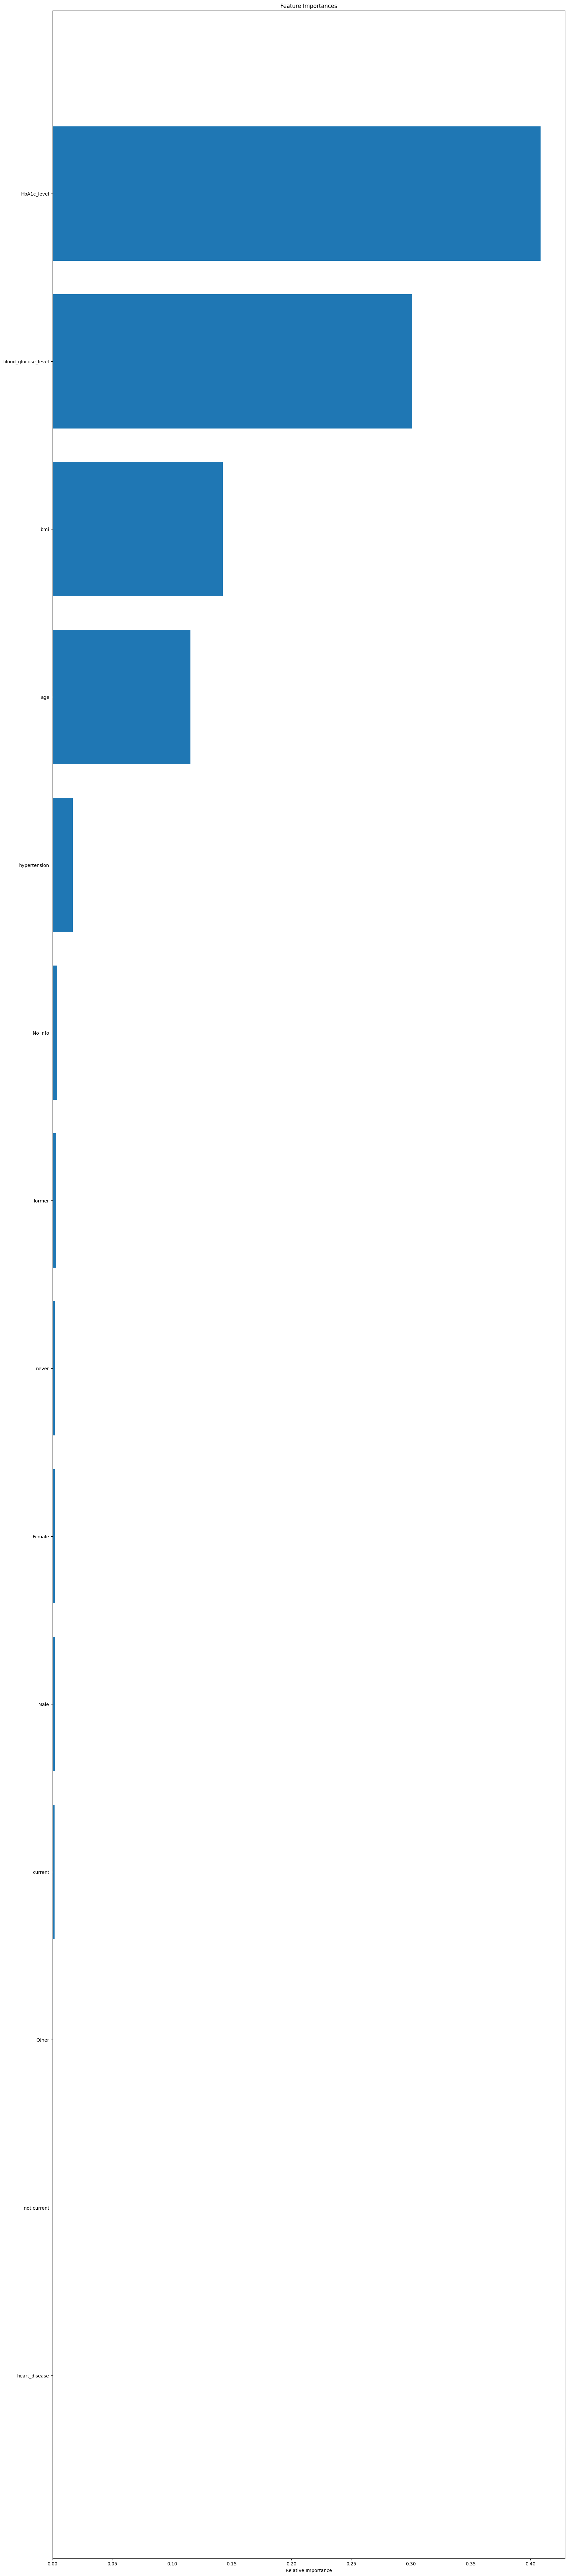

In [70]:
importances = rf2.feature_importances_
indices = np.argsort(importances) # Sorting importances

plt.figure(figsize=(20, 100)) # Making a large feature
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center") # Making the graph look presentable with a bar
plt.yticks(range(len(indices)), [feature_names[i] for i in indices]) # Sorting y ticks
plt.xlabel("Relative Importance")
plt.show()

In [71]:
# This code I used from the professor!
f_names=list(X_train_no_outliers.columns) # Feature names
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10,2), dpi=3000) # Setup the 1x5 grid for ploting the trees
for index in range(0, 5): # Iterate through the first five trees (of 100)
  tree.plot_tree(rf2.estimators_[index], feature_names=f_names, filled = True, ax=axes[index]); # Plot the tree
  axes[index].set_title('Estimator: ' + str(index), fontsize = 11) # Print title

Error in callback <function flush_figures at 0x7f72114a1480> (for post_execute):


KeyboardInterrupt: ignored

## Model 3 -LogisticRegression

### Testing with Outliers

The model had a accuracy socre of :  0.9585
The model had a precision socre of :  0.6171
The model had a recall socre of :  0.8714
The model had a f1 socre of :  0.7225


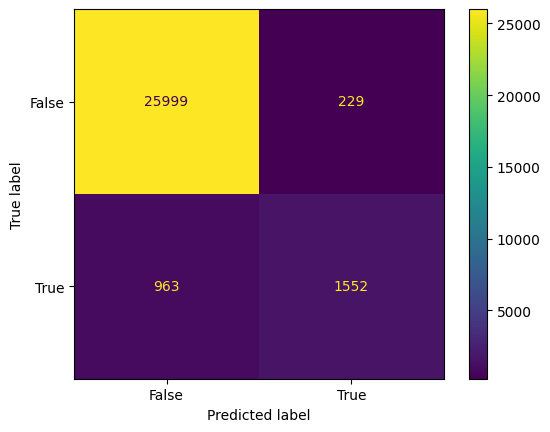

In [ ]:
clf1 = LogisticRegression(random_state=0).fit(X_train_outliers, y_train_outliers)
test_pred = clf1.predict(X_test)
Calculate_Model_Scores(test_pred,y_test)
Confusion_Matrix(test_pred,y_test)

### Testing with no Outliers


The model had a accuracy socre of :  0.9428
The model had a precision socre of :  0.639
The model had a recall socre of :  0.6859
The model had a f1 socre of :  0.6616


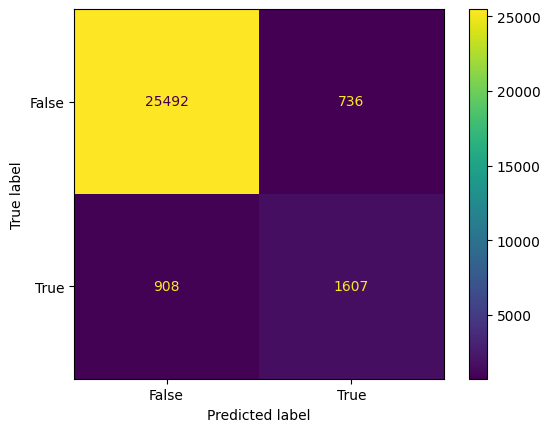

In [ ]:
clf2 = LogisticRegression(random_state=0).fit(X_train_no_outliers, y_train_no_outliers)
test_pred = clf2.predict(X_test)
Calculate_Model_Scores(test_pred,y_test)
Confusion_Matrix(test_pred,y_test)

## Model 4 - AdaBoost

Model Should perform better since it works decently well with class imbalance.

### Testing with Outliers

The model had a accuracy socre of :  0.9716
The model had a precision socre of :  0.6895
The model had a recall socre of :  0.9797
The model had a f1 socre of :  0.8093


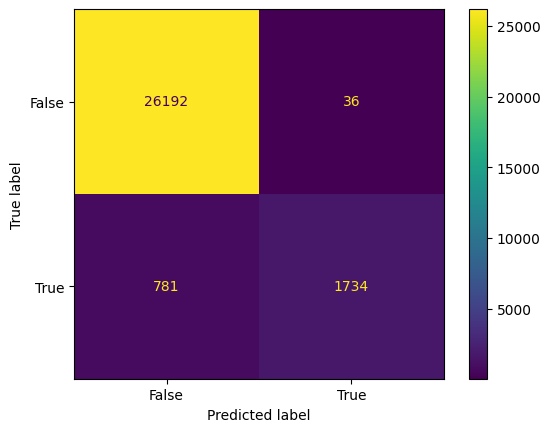

In [ ]:
clf3 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf3.fit(X_train_outliers, y_train_outliers)
test_pred = clf3.predict(X_test)
Calculate_Model_Scores(test_pred,y_test)
Confusion_Matrix(test_pred,y_test)

### Testing without Outliers

The model had a accuracy socre of :  0.9712
The model had a precision socre of :  0.6863
The model had a recall socre of :  0.9785
The model had a f1 socre of :  0.8067


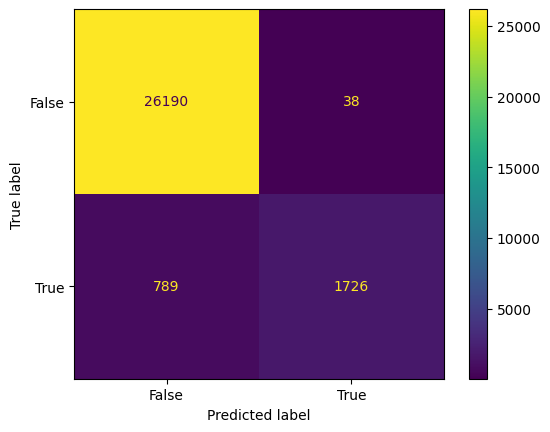

In [ ]:
clf4 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf4.fit(X_train_no_outliers, y_train_no_outliers)
test_pred = clf4.predict(X_test)
Calculate_Model_Scores(test_pred,y_test)
Confusion_Matrix(test_pred,y_test)

## Model 5 - XG Boost

### Testing with Outliers

The model had a accuracy socre of :  0.9718
The model had a precision socre of :  0.6879
The model had a recall socre of :  0.9852
The model had a f1 socre of :  0.8101


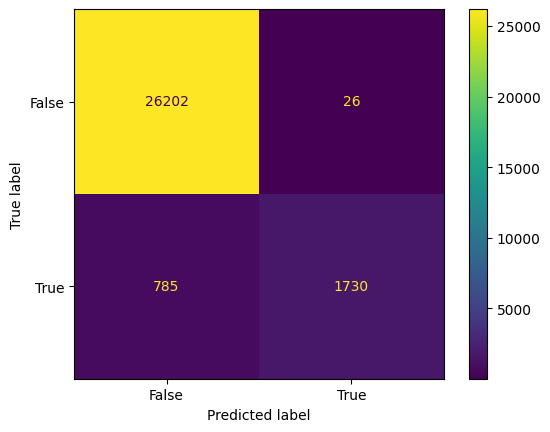

In [ ]:
clf5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train_outliers, y_train_outliers)
test_pred = clf5.predict(X_test)
Calculate_Model_Scores(test_pred,y_test)
Confusion_Matrix(test_pred,y_test)

### Testing without Outliers

The model had a accuracy socre of :  0.9711
The model had a precision socre of :  0.6767
The model had a recall socre of :  0.9895
The model had a f1 socre of :  0.8038


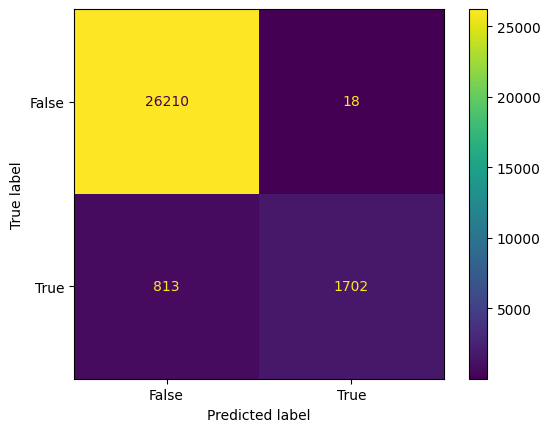

In [ ]:
clf6 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train_no_outliers, y_train_no_outliers)
test_pred = clf6.predict(X_test)
Calculate_Model_Scores(test_pred,y_test)
Confusion_Matrix(test_pred,y_test)

## Model 6 - RandomForestClassifier with Bayesian

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from hyperopt import fmin,tpe,Trials,STATUS_OK,hp
from sklearn.model_selection import cross_val_score

In [ ]:
RNF = RandomForestClassifier()

In [ ]:
Space = {
    'n_estimators' : hp.quniform('n_estimators',50,500,50),
    'criterion' : hp.choice('criterion',["gini", "entropy", "log_loss"]),
    'max_depth' : hp.quniform('max_depth',1,10,1)

}

In [ ]:
def Bayesian(Space):
  RNF = RandomForestClassifier(n_estimators = int(Space['n_estimators']),
                               criterion=Space['criterion'],
                               max_depth=int(Space['max_depth']))
  accuracy = cross_val_score(RNF,X_train_no_outliers,y_train_no_outliers,cv=5).mean()
  return {'loss':-accuracy , 'status' : STATUS_OK}

In [ ]:
trials = Trials()

In [ ]:
Best = fmin(fn=Bayesian,space=Space,algo=tpe.suggest,trials=trials,max_evals=50)

100%|██████████| 50/50 [26:59<00:00, 32.39s/trial, best loss: -0.9748498759329088]


In [ ]:
Best

{'criterion': 0, 'max_depth': 6.0, 'n_estimators': 350.0}

In [ ]:
RNF = RandomForestClassifier(criterion = 'entropy', max_depth = 7, n_estimators=400)

In [ ]:
RNF.fit(X_train_no_outliers,y_train_no_outliers)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=400)

In [ ]:
y_pred_bayes = RNF.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
Calculate_Model_Scores(y_pred_bayes,y_test)

The model had a accuracy socre of :  0.971
The model had a precision socre of :  0.6684
The model had a recall socre of :  1.0
The model had a f1 socre of :  0.8012


In [ ]:
print(classification_report(y_test,y_pred_bayes))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26228
           1       1.00      0.67      0.80      2515

    accuracy                           0.97     28743
   macro avg       0.98      0.83      0.89     28743
weighted avg       0.97      0.97      0.97     28743



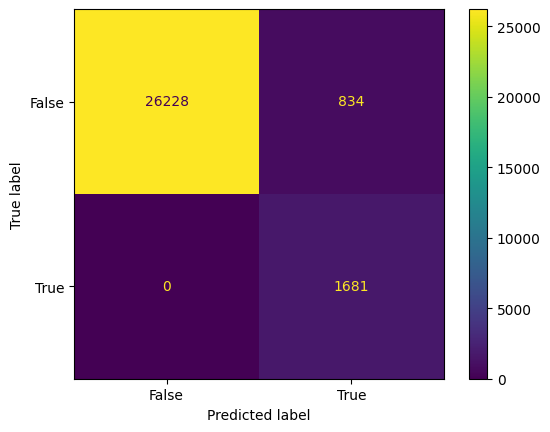

In [ ]:
Confusion_Matrix(y_pred_bayes,y_test)

## Model 7 - Support Vector Machines

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_no_outliers, y_train_no_outliers)
y_pred_svm = svm.predict(X_test)

0.9435688689420033
0.9468554504348604
0.9435688689420033
0.930986271395519


In [ ]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     26228
           1       1.00      0.36      0.52      2515

    accuracy                           0.94     28743
   macro avg       0.97      0.68      0.75     28743
weighted avg       0.95      0.94      0.93     28743



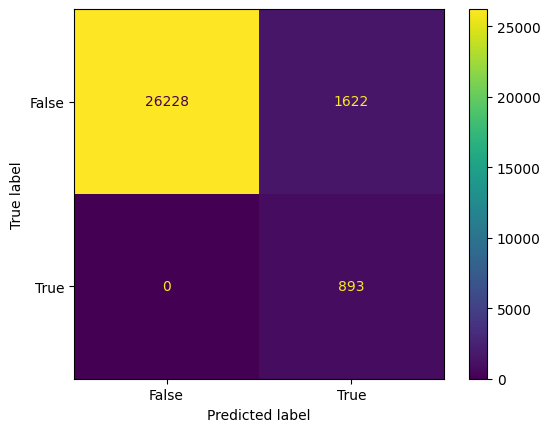

In [ ]:
Confusion_Matrix(y_pred_svm,y_test)